## Principle Component Analysis

So far, the problems we have looked at had only a handful of input variables. In practice, the number of varables in a machine learning model is a lot higher. As the number of variables grows, the data will become harder to work with.

Relationships between variables grows, the data becomes hader to see, training slows down, and the chance of overfitting increases. It is, therefore, useful to know a bit about how to reduce the number of variables.

# Dimensionality Reduction

Remember that data points can be represented as a vector, an array of points in a feature space, e.g [4,3] for the sepal length and width of an instance in the Iris dataset.

A subset of the Iris dataset containing only sepal lengths and widths can be visualised in a 2-dimensional space.

C:\Users\nizaa\AppData\Local\Temp\ipykernel_28180\376193983.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma')


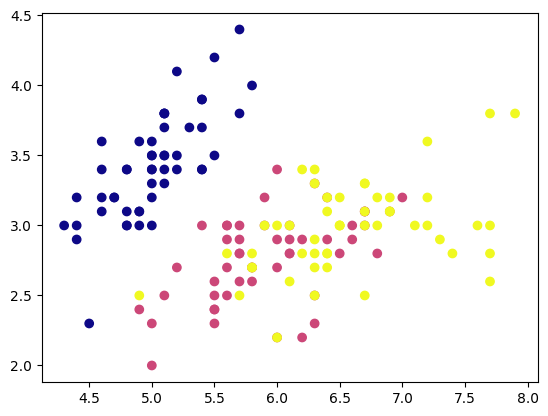

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

cmap = plt.cm.get_cmap('plasma')

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'],c=iris.target, cmap=cmap)

plt.show()

One that also included the petal length would be 3-dimensional

C:\Users\nizaa\AppData\Local\Temp\ipykernel_28180\10908803.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


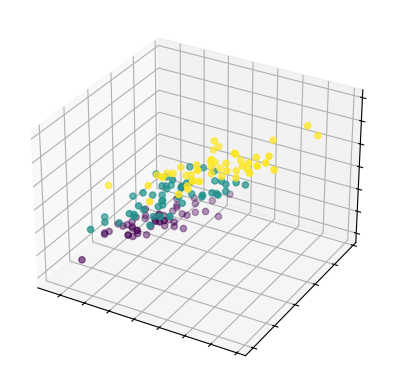

In [73]:
fig, ax = plt.subplots(subplot_kw={'projection' : '3d'})
cmap = plt.cm.get_cmap('viridis')

ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], c=iris.target, cmap=cmap)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

In previous examples, there were usually up to 3 input varables to a problem. Usually, it was easy to see how the input variable might impact the dependant variable. Suppose now that we need to categorise items based on dozens of features, or even hundreds. With 10 variables we would need around 45 plots to examine the relationship between each pair of variables. 

Inspecting all of them would take time, and it'd be hard to find a pattern that applies to all of the data. This means we need to have methods for dealing with multi-dimensionality in our repitoire.

In many cases, we will find our approach benefits from performing dimensionality reduction. Some reasons why dimensionality reduction is useful include: 

- Reducing the dimensionality simplifies the dataset, facilitating description and visualisation.

- Reducing the dimensionality of the dataset reducesthe size of the distance on which clustering algorithms must calculate the dissimiarity between the observations. This may improve their efficiency and positively affect their performance.

- Reducing the dimensionality of the dataset reduces the risk of overfitting.

# Inner-feature correlation

Let’s say that you are trying to make a classification in the Iris dataset. You have
your four features (petal and sepal widths and lengths), and your output prediction
(which species it belongs to). We know that all four features are valuable in making
the prediction. However, we also know that, generally speaking, the longer a petal
is, the wider it is (and vice-versa). In addition, larger petals generally mean larger
sepals, especially if it is just a slightly bigger plant.


What this means is that there is some correlation in the features themselves. To a
certain degree, you can predict the size of a petal by looking at the size of a sepal.
In other words, you could remove that data and still have a pretty good prediction.

## Applying PCA

In [34]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Load up our data
df = pd.read_csv('countries.csv')
df.head()

,Country,Country Groups,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,FP.CPI.TOTL.ZG,IT.CEL.SETS.P2,IT.NET.USER.ZS,NE.EXP.GNFS.ZS,...,NY.GDP.PCAP.CD,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.URB.TOTL.IN.ZS
0,CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,...,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
1,CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,...,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
2,EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,...,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
3,EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,...,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
4,EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,...,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


## Preprocessing

In [52]:

# Those column names don't make much sense, let us change that.

col_names = pd.read_html('https://data.cmucreatelab.org/earthtime/WorldBank/')
col_names = col_names[0].set_index('Indicator Code')

df = df.rename(columns={c: col_names.loc[c]['Indicator Name'] for c in df.columns[2:]})
df.head()

,Country,Country Groups,"Foreign direct investment, net inflows (% of GDP)",Access to electricity (% of population),Refugee population by country or territory of origin,CO2 emissions (metric tons per capita),"Inflation, consumer prices (annual %)",Mobile cellular subscriptions (per 100 people),Individuals using the Internet (% of population),Exports of goods and services (% of GDP),...,GDP per capita (current US$),"Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Life expectancy at birth, total (years)","Fertility rate, total (births per woman)","Population ages 80 and above, male (% of male population)",Urban land area where elevation is below 5 meters (sq. km)
0,CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,...,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
1,CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,...,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
2,EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,...,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
3,EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,...,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
4,EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,...,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


In [53]:
# Shorten column names for easier plotting

df = df.rename(columns={c: c.split('(')[0] for c in df.columns[2:]})
df.head()

,Country,Country Groups,"Foreign direct investment, net inflows",Access to electricity,Refugee population by country or territory of origin,CO2 emissions,"Inflation, consumer prices",Mobile cellular subscriptions,Individuals using the Internet,Exports of goods and services,...,GDP per capita,"Mortality rate, adult, female","Mortality rate, adult, male","Birth rate, crude","Death rate, crude","Mortality rate, infant","Life expectancy at birth, total","Fertility rate, total","Population ages 80 and above, male",Urban land area where elevation is below 5 meters
0,CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,...,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
1,CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,...,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
2,EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,...,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
3,EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,...,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
4,EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,...,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


In [54]:
# Finally drop the Country column, as we will not need it

df = df.drop(columns=['Country'])
df = df.set_index('Country Groups')

df.head()

,"Foreign direct investment, net inflows",Access to electricity,Refugee population by country or territory of origin,CO2 emissions,"Inflation, consumer prices",Mobile cellular subscriptions,Individuals using the Internet,Exports of goods and services,Imports of goods and services,GDP per capita,"Mortality rate, adult, female","Mortality rate, adult, male","Birth rate, crude","Death rate, crude","Mortality rate, infant","Life expectancy at birth, total","Fertility rate, total","Population ages 80 and above, male",Urban land area where elevation is below 5 meters
Country Groups,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,53.038989,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,43.747235,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,27.095971,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,27.370720,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,29.112597,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


## Inspect Data

To diagnose redundancy, follow these steps : 

    1. Remove target data from the dataframe
    2. Use df.corr() method to get the correlation coefficients of each feature with each other feature
    3. Plot a heatmap of the correlation coefficients

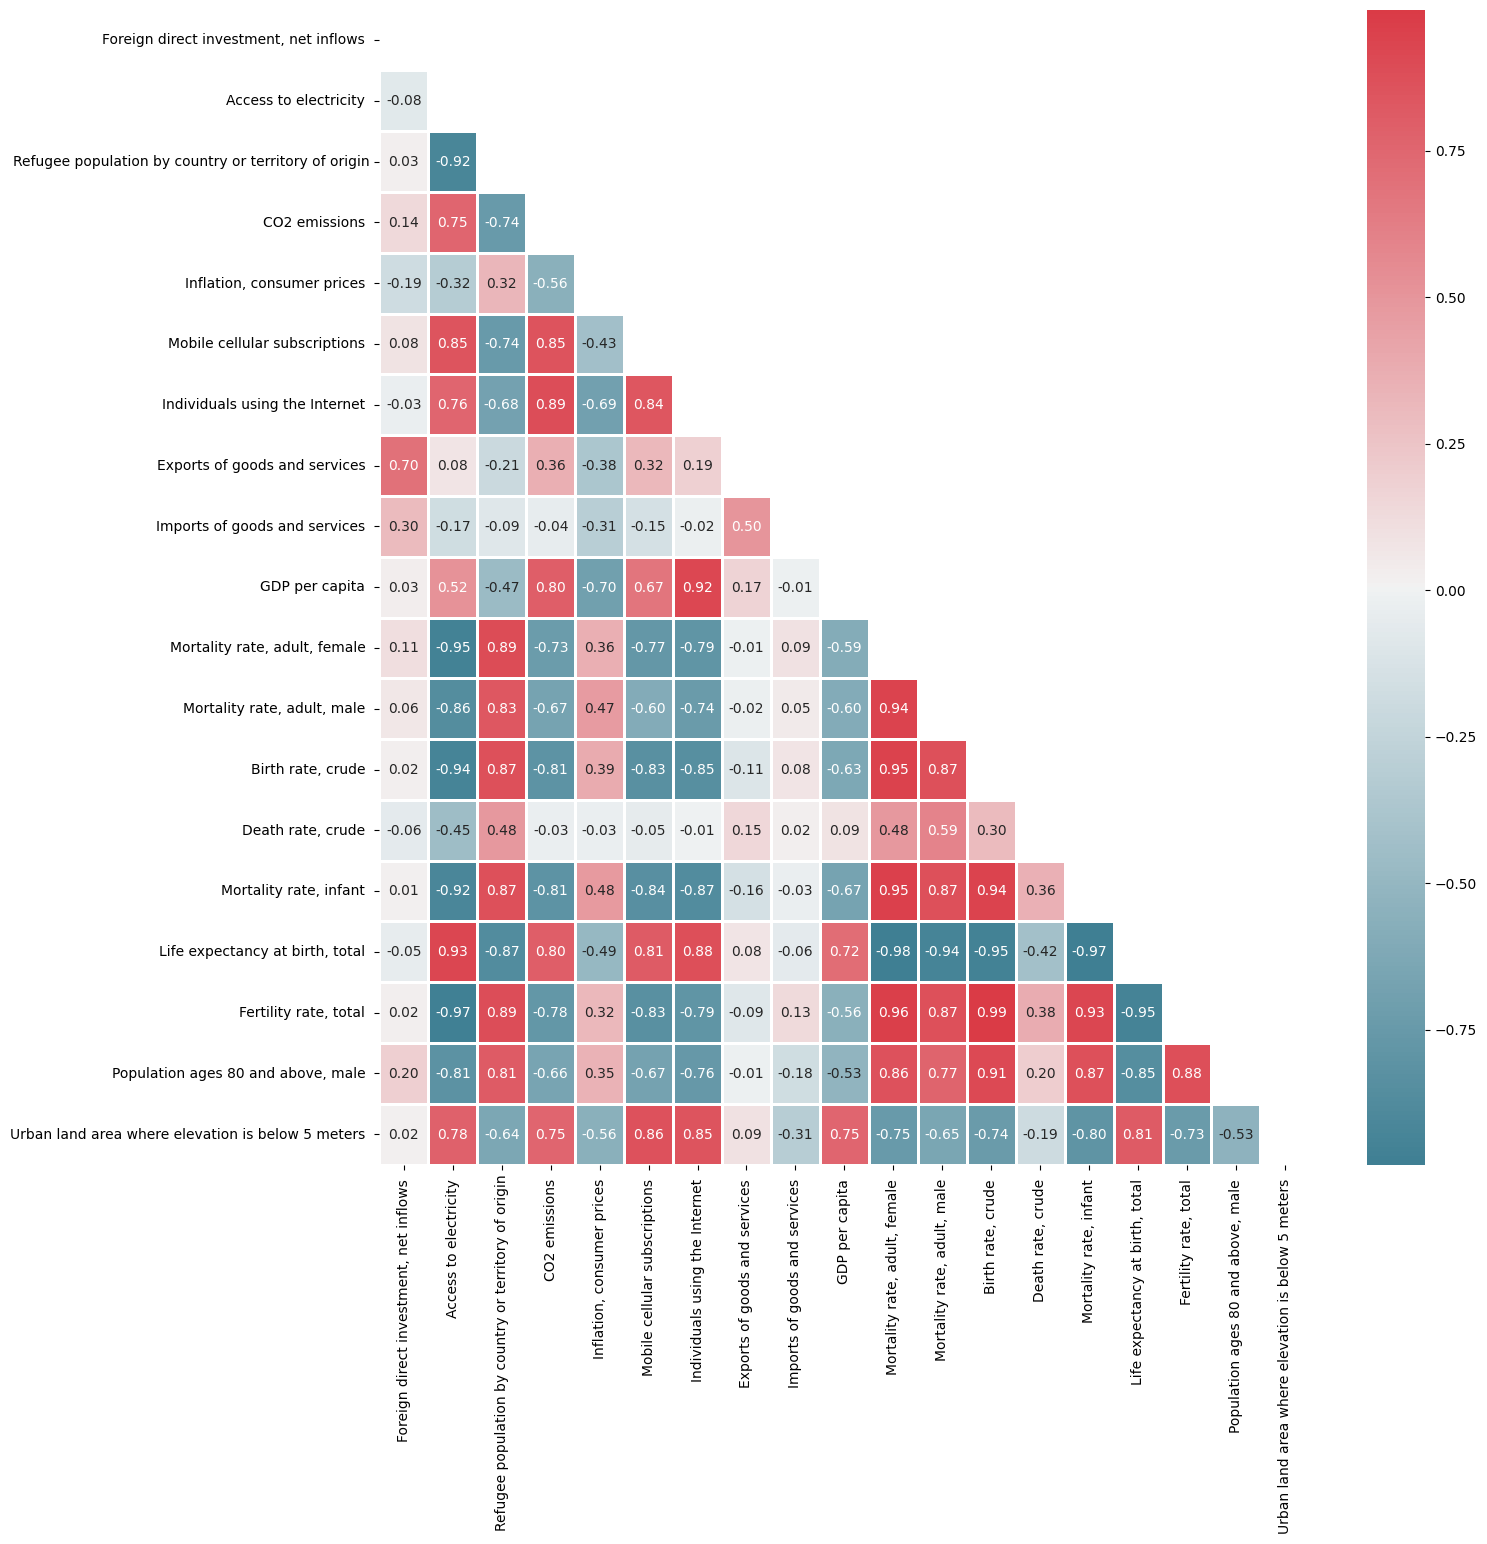

In [55]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

def correlation_heatmap(df):

    # Get correlations
    corrs = df.corr()

    # Plot figsize
    fig, ax = plt.subplots(figsize=(15,15))

    # The heatmap will mirror itself, that's redundant
    # So lets mask it, for viewing pleasure.

    drop_self = np.zeros_like(corrs)
    drop_self[np.triu_indices_from(drop_self)] = True

    # Generate heat map

    ax = sns.heatmap(corrs, cmap=cmap, annot=True, fmt=".2f", mask=drop_self, linewidth=2)
    plt.show()

correlation_heatmap(df)

A heatmap is essentially a 2D grid. When looking at cell (0,1) in the grid, the value
there shows the correlation between features 0 and 1. To analyse the correlation
coefficient heatmap, look at each value. Each value in this matrix lies between -1
and 1. If it is:

- Close to 1: This denotes a high positive correlation (i.e. the higher one value
gets, the higher the other value gets). This needs to be removed in the data.


- Close to 0: There is little to no correlation between features. This is the ideal
case.


- Close to -1: There is a high negative correlation between features (i.e. the
lower one value gets, the higher the other gets). Like the case of it being
close to 1, this is bad and needs to be removed.

How do we remove these correlations? One way may be to remove features that
are correlated mostly with other features. However, this isn’t very practical, as these
features still hold some valuable information in them. There is a way to extract this
valuable information out of the feature and leave the less valuable stuff behind.
This is done by creating principal components out of the features using Principal
Component Analysis.

In [56]:
# drop rows with missing values

df = df.dropna()

# Select and standardize features
X = StandardScaler().fit_transform(df.values)

# Choose the number of components to be generated

nr_comps = 5
pca = PCA(n_components=nr_comps)

principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(principal_components, index=df.index)

pca_df.head()

,0,1,2,3,4
Country Groups,,,,,
Central Europe and the Baltics,-3.924609,3.315577,-0.842078,2.356141,2.117642
Caribbean small states,-2.260250,2.044123,1.427297,0.949317,0.775756
East Asia & Pacific (excluding high income),-1.787740,-1.080702,1.057935,-0.020315,0.508347
Early-demographic dividend,0.808716,-1.507746,0.643473,0.165625,0.457137
East Asia & Pacific,-2.287916,-0.782774,0.612767,-0.112555,0.866271


The Principle components are uncorrelated, showing that PCA has summarised all related information in a smaller number of variables. 

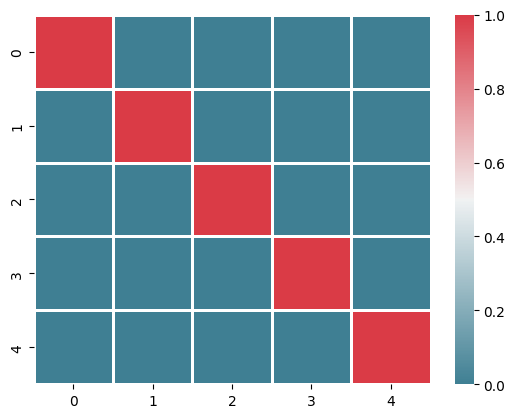

In [60]:
ax = sns.heatmap(pca_df.corr(), cmap=cmap,linewidth=1)s
plt.show()

Standardization: PCA begins by standardizing the dataset, which means scaling each feature (variable) to have a mean of 0 and a standard deviation of 1. This step ensures that all variables are on the same scale, preventing features with larger scales from dominating the analysis.

Covariance Matrix Computation: Next, PCA calculates the covariance matrix of the standardized data. The covariance matrix describes the relationships between all pairs of variables in the dataset. It indicates the direction of the linear relationship between two variables and the strength of that relationship.

Eigenvalue Decomposition: PCA then performs eigenvalue decomposition on the covariance matrix. This step involves finding the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, while eigenvalues represent the magnitude of variance along those directions.

Selection of Principal Components: The eigenvectors (principal components) are ranked based on their corresponding eigenvalues. The principal components with the highest eigenvalues capture the most variance in the data. Typically, the principal components are arranged in descending order of importance.

Dimensionality Reduction: PCA allows for dimensionality reduction by selecting only the top principal components that capture most of the variance in the data. By retaining a subset of the principal components, PCA creates a lower-dimensional representation of the original dataset while minimizing information loss.

Projection: Finally, PCA projects the original data onto the selected principal components. This projection transforms the data from its original high-dimensional space to a lower-dimensional space defined by the principal components. The new dataset retains most of the important information from the original dataset but with fewer dimensions.

In [58]:
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio

array([0.64258073, 0.15351209, 0.07478713, 0.04870308, 0.02796909])

When performing PCA, the principal components are ranked in descending order of the amount of variance they capture. The explained variance ratio provides insights into how much information (variance) each principal component contributes to the overall dataset.

For each principal component, the total variance of the dataset is computed.
The variance explained by each principal component is divided by the total variance to obtain the proportion of variance explained by that component.
The result is a vector of explained variance ratios, with each element corresponding to one principal component.

Suppose you perform PCA on a dataset and obtain the following explained variance ratios for the first three principal components:

- First component: 0.6
- Second component: 0.3
- Third component: 0.1

This means that the first principal component explains 60% of the total variance in the data, the second principal component explains 30%, and the third principal component explains 10%. Together, these three components explain 60% + 30% + 10% = 100% of the variance.